# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.1.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [0]:
import os
#### Add your code here ####
os.chdir('/content/drive/My Drive/Project 2')

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [5]:
#### Add your code here ####
images_path = "/content/drive/My Drive/Project 2/Aligned Face Dataset from Pinterest.zip"

#Extract all the files in the zip file.
from zipfile import ZipFile
with ZipFile(images_path, 'r') as zip:
  zip.extractall()

!ls

'Aligned Face Dataset from Pinterest.zip'      model-0.06.h5
'Face Detection Notebook_Nageswari.ipynb'      model-0.13.h5
'Face recognition  Notebook_Nageswari.ipynb'   pins
 Images.npy				       PINS
 model-0.00.h5				       vgg_face_weights.h5
 model-0.01.h5


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

PINS/pins_Aaron Paul/Aaron Paul0_262.jpg


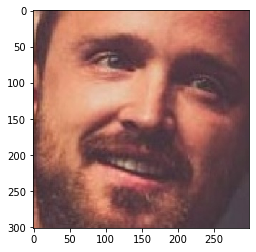

In [8]:
#### Add your code here ####

import matplotlib.pyplot as plt

image_path = metadata[0].image_path()
sample_image = load_image(image_path)
print(image_path)

plt.imshow(sample_image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face() #### Add your code here ####
model.load_weights('vgg_face_weights.h5')
#### Add your code here ####

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [12]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)
print(embedding_vector)

(224, 224, 3)
(2622,)
[ 0.03170307 -0.0150513  -0.01243402 ...  0.00043141  0.00219081
 -0.00908097]


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [13]:
#### Add your code here ####
embeddings = []
count = int(0)
i = 0
print(metadata.size)
for singleImage in metadata:
  img_path = singleImage.image_path()
  try:
    #Counting to see how many images are loading
      i = i+1
      print(singleImage.image_path()) 
      print(i)

      #Get the image
      img = load_image(img_path)
      img = (img / 255.).astype(np.float32)
      img = cv2.resize(img, dsize = (224,224))

      #Predict the vector and add to embeddings list.
      embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
      embeddings.append(embedding_vector)
  except:
      embedding_vector =  np.zeros(int(2622))
      count = count + 1
      embeddings.append(embedding_vector)
      print(count)

#Printing how many images embeddings were predicted and how many failed.
print(len(embeddings))
print("number of images failed to load: ")
print(count)


10770
PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
1
PINS/pins_Aaron Paul/Aaron Paul101_247.jpg
2
PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
3
PINS/pins_Aaron Paul/Aaron Paul101_249.jpg
4
PINS/pins_Aaron Paul/Aaron Paul103_217.jpg
5
PINS/pins_Aaron Paul/Aaron Paul113_228.jpg
6
PINS/pins_Aaron Paul/Aaron Paul114_271.jpg
7
PINS/pins_Aaron Paul/Aaron Paul116_240.jpg
8
PINS/pins_Aaron Paul/Aaron Paul117_213.jpg
9
PINS/pins_Aaron Paul/Aaron Paul119_219.jpg
10
PINS/pins_Aaron Paul/Aaron Paul120_290.jpg
11
PINS/pins_Aaron Paul/Aaron Paul124_221.jpg
12
PINS/pins_Aaron Paul/Aaron Paul126_291.jpg
13
PINS/pins_Aaron Paul/Aaron Paul129_259.jpg
14
PINS/pins_Aaron Paul/Aaron Paul129_260.jpg
15
PINS/pins_Aaron Paul/Aaron Paul130_215.jpg
16
PINS/pins_Aaron Paul/Aaron Paul132_236.jpg
17
PINS/pins_Aaron Paul/Aaron Paul136_225.jpg
18
PINS/pins_Aaron Paul/Aaron Paul137_250.jpg
19
PINS/pins_Aaron Paul/Aaron Paul138_233.jpg
20
PINS/pins_Aaron Paul/Aaron Paul140_243.jpg
21
PINS/pins_Aaron Paul/Aaron Paul145_256.

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

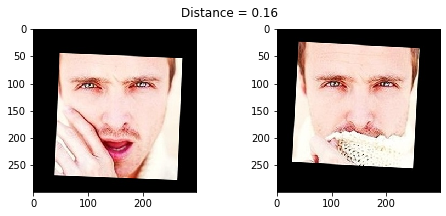

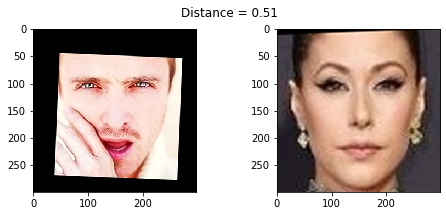

In [15]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [16]:
import pandas as pd 

print(metadata.shape[0])
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#Create test and train collections to populate
X_train = []
X_test = []

y_train = []
y_test = []

y=[]

for i in range(metadata.shape[0]):
  #Collecting all folder names in y
  y.append(metadata[i].name)

  #Collecting all train data based on train_idx
  if(train_idx[i]):
    X_train.append(embeddings[i])
    y_train.append(metadata[i].name)

  #Collecting all test data based on test_idx
  if(test_idx[i]):
    X_test.append(embeddings[i])
    y_test.append(metadata[i].name)


10770


### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#Get encoded y
le = LabelEncoder()
label_encoders = le.fit(y)

#Transform y, y_train and y_test.
y_transformed= label_encoders.transform(y)

y_train_transformed = label_encoders.transform(y_train)
y_test_transformed = label_encoders.transform(y_test)

#### Add your code here ####

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

#### Add your code here ####

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

[3.56338366e+02 1.41550231e+02 1.04638687e+02 ... 4.45872365e-06
 4.39726606e-06 4.33841499e-06]
[0.13588907 0.18986903 0.22977282 ... 1.         1.         1.        ]


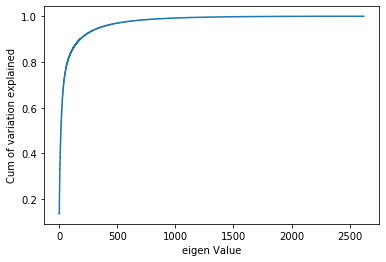

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2621)
pca.fit(X_train_scaled)

print(pca.explained_variance_)

print(np.cumsum(pca.explained_variance_ratio_))
plt.step(list(range(1,2622)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


#try 1000 - reducing to 1000 from 2621, since the plot is flat after 1000.

pca1000 = PCA(n_components=1000)
pca1000.fit(X_train_scaled)

X_train_scaled_pca = pca1000.transform(X_train_scaled)
X_test_scaled_pca = pca1000.transform(X_test_scaled)

#### Add your code here ####

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [20]:
from sklearn.svm import SVC
from sklearn import metrics
import pickle 
from tensorflow.keras.models import Model

#Create a base model to predict transformed input
base_model = SVC(kernel='linear', gamma='auto', C=0.1)
base_model.fit(X_train_scaled_pca, y_train_transformed)

#Printing the score of the base model.
print(base_model.score(X_test_scaled_pca, y_test_transformed))

#Pickle the model for later use.
saved_model = pickle.dumps(base_model) 


def predict_SVC(input):
  #Resize the input image to input to vgg face descriptor
  input = cv2.resize(input, dsize = (224,224))

  #Predict the embedding vector of the image
  embedding_vector_predicted = vgg_face_descriptor.predict(np.expand_dims(input, axis=0))

  #Tranform the embedding vector
  embedding_vector_predicted_pca =  pca1000.transform(embedding_vector_predicted)

  #Retrieve the pickled model
  model = pickle.loads(saved_model)

  #Predict Y for the reduced image
  prediction = model.predict(embedding_vector_predicted_pca)
  
  return prediction
#### Add your code here ####

0.9615705931495405


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

PINS/pins_Alvaro Morte/Alvaro Morte111_820.jpg


Text(0.5, 1.0, 'Identified as pins_Alvaro Morte')

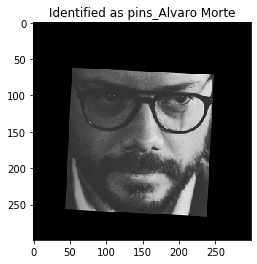

In [21]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
print(metadata[test_idx][example_idx].image_path())

example_prediction = predict_SVC(example_image)#### Add your code here ####
example_identity = label_encoders.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}')
